## 1. Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the CSV file into a pandas DataFrame
file_path = "../data/stocks_clean.csv"
data = pd.read_csv(file_path)
print(data.head())

         Date  aapl_adj_close  msft_adj_close_lag  googl_adj_close_lag  \
0  2017-09-18       37.234501           69.565742            46.648991   
1  2017-09-19       37.248585           69.427216            46.372673   
2  2017-09-20       36.624371           69.685829            46.727295   
3  2017-09-21       35.995461           69.223961            47.259975   
4  2017-09-22       35.643456           68.549644            47.260471   

   amzn_adj_close_lag  tsla_adj_close_lag  meta_adj_close_lag  \
0           49.339500           25.320667          171.124756   
1           48.709499           25.666668          169.499649   
2           48.493000           25.006666          172.002121   
3           48.660500           24.927334          171.653168   
4           48.232498           24.431999          170.596359   

   sp500_adj_close_lag  10y_treasury_yield_lag  aapl_sma_10_lag  \
0          2500.229980                   2.202        37.736682   
1          2503.870117        

## 2. Check for Stationarity

In [7]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tqdm import tqdm

In [8]:
# List of columns to check for stationarity
columns_to_check = [
    'aapl_adj_close', 
    'msft_adj_close_lag', 
    'googl_adj_close_lag',
    'amzn_adj_close_lag',
    'tsla_adj_close_lag',
    'meta_adj_close_lag',
    'sp500_adj_close_lag',
    '10y_treasury_yield_lag',
    'aapl_sma_10_lag',
    'aapl_ema_20_lag'
]

# Function to apply ADF test and print results
def adf_test(series, column_name):
    adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(series)
    adf_results_string = 'Column: {}\nADF: {}\np-value: {}\nNumber of observations: {}\nCritical values: {}\n'
    print(adf_results_string.format(column_name, adf, p, nobs, cvs))
    
    # Interpret the results
    if p <= 0.05:
        print(f"The time series '{column_name}' is stationary.\n")
    else:
        print(f"The time series '{column_name}' is not stationary.\n")

# Apply ADF test for each column
for column in columns_to_check:
    adf_test(data[column], column)

Column: aapl_adj_close
ADF: -0.08836021695954817
p-value: 0.9505856301965474
Number of observations: 1769
Critical values: {'1%': -3.4340519866364954, '5%': -2.8631752211631247, '10%': -2.5676405414939345}

The time series 'aapl_adj_close' is not stationary.

Column: msft_adj_close_lag
ADF: -0.20677735660572638
p-value: 0.9377089382186237
Number of observations: 1760
Critical values: {'1%': -3.4340709449678415, '5%': -2.8631835901181564, '10%': -2.567644997740186}

The time series 'msft_adj_close_lag' is not stationary.

Column: googl_adj_close_lag
ADF: -0.5997654284485309
p-value: 0.8710350216247098
Number of observations: 1766
Critical values: {'1%': -3.434058284578546, '5%': -2.863178001328962, '10%': -2.567642021857433}

The time series 'googl_adj_close_lag' is not stationary.

Column: amzn_adj_close_lag
ADF: -1.6136111664571442
p-value: 0.4760802668661439
Number of observations: 1769
Critical values: {'1%': -3.4340519866364954, '5%': -2.8631752211631247, '10%': -2.5676405414939345

In [9]:
# Apply first differencing to all columns except 'Date'
differenced_data = data.copy()

# Apply differencing to all columns except the 'Date' column
for col in differenced_data.columns:
    if col != 'Date':  # Skip the 'Date' column
        differenced_data[col] = differenced_data[col].diff()

# Drop rows with NaN values caused by differencing
differenced_data = differenced_data.dropna()

# Display the differenced data
print(differenced_data.head())

         Date  aapl_adj_close  msft_adj_close_lag  googl_adj_close_lag  \
1  2017-09-19        0.014084           -0.138527            -0.276318   
2  2017-09-20       -0.624214            0.258614             0.354622   
3  2017-09-21       -0.628910           -0.461868             0.532681   
4  2017-09-22       -0.352005           -0.674316             0.000496   
5  2017-09-25       -0.314438            0.184776            -0.213966   

   amzn_adj_close_lag  tsla_adj_close_lag  meta_adj_close_lag  \
1           -0.630001            0.346001           -1.625107   
2           -0.216499           -0.660002            2.502472   
3            0.167500           -0.079332           -0.348953   
4           -0.428001           -0.495335           -1.056808   
5           -0.477497           -1.025999           -0.568298   

   sp500_adj_close_lag  10y_treasury_yield_lag  aapl_sma_10_lag  \
1             3.640137                   0.027        -0.126251   
2             2.779785        

In [10]:
# Apply ADF test for each column
for column in columns_to_check:
    adf_test(differenced_data[column], column)

Column: aapl_adj_close
ADF: -42.56427958822331
p-value: 0.0
Number of observations: 1768
Critical values: {'1%': -3.434054083572257, '5%': -2.8631761468358614, '10%': -2.567641034389652}

The time series 'aapl_adj_close' is stationary.

Column: msft_adj_close_lag
ADF: -13.702629421118916
p-value: 1.2811432030004936e-25
Number of observations: 1760
Critical values: {'1%': -3.4340709449678415, '5%': -2.8631835901181564, '10%': -2.567644997740186}

The time series 'msft_adj_close_lag' is stationary.

Column: googl_adj_close_lag
ADF: -26.004795157775
p-value: 0.0
Number of observations: 1766
Critical values: {'1%': -3.434058284578546, '5%': -2.863178001328962, '10%': -2.567642021857433}

The time series 'googl_adj_close_lag' is stationary.

Column: amzn_adj_close_lag
ADF: -42.54297069502079
p-value: 0.0
Number of observations: 1768
Critical values: {'1%': -3.434054083572257, '5%': -2.8631761468358614, '10%': -2.567641034389652}

The time series 'amzn_adj_close_lag' is stationary.

Column: 

## 3. 

In [11]:
# Function to split the data into train, validation, and test sets (60% train, 20% val, 20% test)
def train_val_test_split(data, train_size=0.6, val_size=0.2):
    train_end = int(len(data) * train_size)
    val_end = int(len(data) * (train_size + val_size))
    
    train = data[:train_end]
    val = data[train_end:val_end]
    test = data[val_end:]
    
    return train, val, test

In [12]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
# Define a function to train ARIMA model and calculate evaluation metrics
def train_and_evaluate_arima(train, val, test, order):
    # Train the ARIMA model
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    
    # Make predictions on validation set
    val_predictions = model_fit.forecast(steps=len(val))
    
    # Make predictions on test set
    test_predictions = model_fit.forecast(steps=len(test))
    
    # Calculate metrics for validation and test sets
    val_rmse = root_mean_squared_error(val, val_predictions)
    val_mae = mean_absolute_error(val, val_predictions)
    val_mape = mean_absolute_percentage_error(val, val_predictions)
    
    test_rmse = root_mean_squared_error(test, test_predictions)
    test_mae = mean_absolute_error(test, test_predictions)
    test_mape = mean_absolute_percentage_error(test, test_predictions)
    
    return val_rmse, val_mae, val_mape, test_rmse, test_mae, test_mape, model_fit

In [16]:
# Hyperparameter tuning using grid search
def grid_search_arima(train, val, p_values, d_values, q_values):
    best_score, best_order = float("inf"), None
    for p in tqdm(p_values):
        for d in d_values:
            for q in q_values:
                try:
                    order = (p, d, q)
                    val_rmse, _, _, _, _, _, _ = train_and_evaluate_arima(train, val, test, order)
                    if val_rmse < best_score:
                        best_score, best_order = val_rmse, order
                except:
                    continue
    return best_order, best_score

In [17]:
# Split data into train, validation, and test sets
train, val, test = train_val_test_split(differenced_data['aapl_adj_close'], train_size=0.6, val_size=0.2)

In [18]:
# Define parameter grid for ARIMA (p, d, q)
p_values = [0, 1, 2, 3, 4, 5]
d_values = [0, 1]
q_values = [0, 1, 2, 3]

In [19]:
# Perform grid search for best ARIMA parameters on validation set
best_order, best_score = grid_search_arima(train, val, p_values, d_values, q_values)
print(f"Best ARIMA order: {best_order} with Validation RMSE: {best_score}")

  0%|          | 0/6 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Libra

Best ARIMA order: (5, 1, 0) with Validation RMSE: 3.1192277646357858


In [20]:
# Train the best model and evaluate on test set
val_rmse, val_mae, val_mape, test_rmse, test_mae, test_mape, best_model = train_and_evaluate_arima(train, val, test, best_order)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versio

In [21]:
print(f"Best Model - Validation Metrics:\nRMSE: {val_rmse}\nMAE: {val_mae}\nMAPE: {val_mape}")
print(f"Best Model - Test Metrics:\nRMSE: {test_rmse}\nMAE: {test_mae}\nMAPE: {test_mape}")

Best Model - Validation Metrics:
RMSE: 3.1192277646357858
MAE: 2.4155859984997754
MAPE: inf
Best Model - Test Metrics:
RMSE: 2.6207526247761135
MAE: 1.8978640422203512
MAPE: nan


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

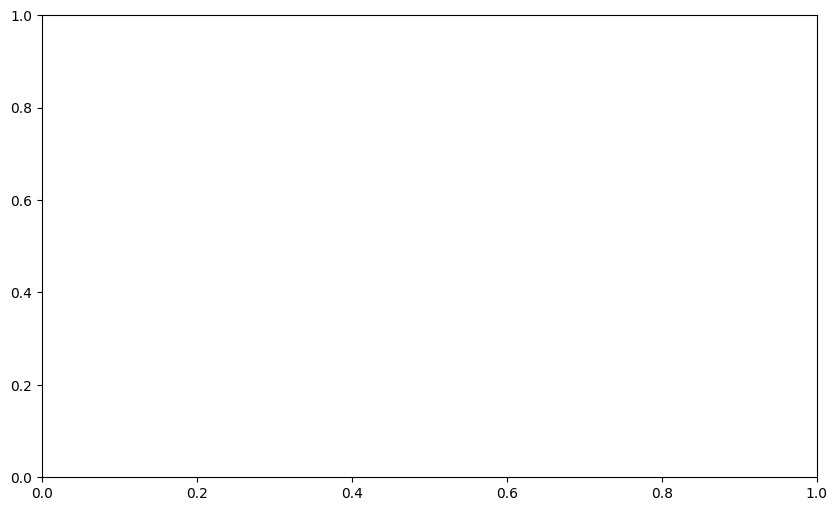

In [22]:
# Plot the actual vs predicted values for the test set
test_predictions = best_model.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual AAPL Prices')
plt.plot(test.index, test_predictions, label='Predicted AAPL Prices', color='red')
plt.title('ARIMA Model - AAPL Price Prediction (Best Model)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()